In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf
import plotly.express as px
import nbformat 
import plotly.io as pio

# Correlation analysis for the Stock markets

# Date Alignment

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data from different CSV files and rename 'Close' column to stock ticker
aapl_df = pd.read_csv('AAPL_historical_data.csv', parse_dates=['Date'], index_col='Date').rename(columns={'Close': 'AAPL'})
msft_df = pd.read_csv('MSFT_historical_data.csv', parse_dates=['Date'], index_col='Date').rename(columns={'Close': 'MSFT'})
meta_df = pd.read_csv('META_historical_data.csv', parse_dates=['Date'], index_col='Date').rename(columns={'Close': 'META'})
goog_df = pd.read_csv('GOOG_historical_data.csv', parse_dates=['Date'], index_col='Date').rename(columns={'Close': 'GOOG'})
amzn_df = pd.read_csv('AMZN_historical_data.csv', parse_dates=['Date'], index_col='Date').rename(columns={'Close': 'AMZN'})
nvda_df = pd.read_csv('NVDA_historical_data.csv', parse_dates=['Date'], index_col='Date').rename(columns={'Close': 'NVDA'})
tsla_df = pd.read_csv('TSLA_historical_data.csv', parse_dates=['Date'], index_col='Date').rename(columns={'Close': 'TSLA'})



In [8]:
# Step 2: Concatenate DataFrames along the columns (axis=1) and drop NaN values
merged_df = pd.concat([aapl_df['AAPL'], msft_df['MSFT'], meta_df['META'], 
                       goog_df['GOOG'], amzn_df['AMZN'], nvda_df['NVDA'], tsla_df['TSLA']], axis=1).dropna()

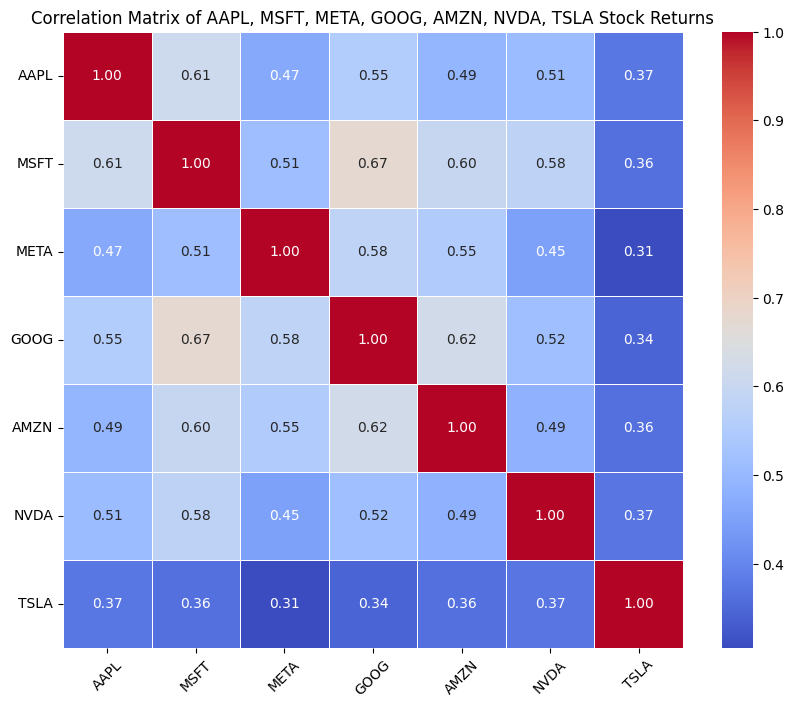

          AAPL      MSFT      META      GOOG      AMZN      NVDA      TSLA
AAPL  1.000000  0.613575  0.467815  0.553426  0.493896  0.507142  0.374271
MSFT  0.613575  1.000000  0.513209  0.674880  0.597215  0.578032  0.364659
META  0.467815  0.513209  1.000000  0.580953  0.550117  0.448621  0.305030
GOOG  0.553426  0.674880  0.580953  1.000000  0.622461  0.516559  0.343973
AMZN  0.493896  0.597215  0.550117  0.622461  1.000000  0.486573  0.363447
NVDA  0.507142  0.578032  0.448621  0.516559  0.486573  1.000000  0.372038
TSLA  0.374271  0.364659  0.305030  0.343973  0.363447  0.372038  1.000000


In [10]:
# Step 3: Calculate daily returns
returns = merged_df.pct_change().dropna()

# Step 4: Compute the correlation matrix
correlation_matrix = returns.corr()

# Step 5: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix of AAPL, MSFT, META, GOOG, AMZN, NVDA, TSLA Stock Returns")

# Use seaborn's heatmap with annot=True to display the numbers
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Print the correlation matrix
print(correlation_matrix)